# 《第一次作业：贝叶斯决策理论》 编程题

In [1]:
import time

import numpy as np
import matplotlib.pyplot as plt


class GaussianDistriCls:
    """
    a given class whose conditional density is determined by Gaussian(i.e. Normal) distribution
    """
    def __init__(self, dim, mean, covariance, prior=None):
        self.dim = dim
        self.mean = mean
        self.cov = covariance
        self.prior = prior

    def generate(self, size):
        """ Generate independent identically distributed samples

        :param size: the number of samples to be generated
        :return: the list of samples(feature vectors)
        """
        np.random.seed(size + int(time.time()))
        return np.random.multivariate_normal(self.mean, self.cov, size)  # 直接调用numpy库函数

    def discriminant_func(self, feature):
        """The discriminant function for the minimum-error-rate case

        :param feature: the feature vector of a single sample
        :return: the rectified 'posterior probability'.
        """
        if self.prior is None:
            return -0.5*(feature-self.mean) @ np.linalg.inv(self.cov) @ (feature-self.mean) -0.5*np.log(np.linalg.det(self.cov))
        else:
            return -0.5*(feature-self.mean).transpose() @ np.linalg.inv(self.cov) @ (feature-self.mean) -0.5*np.log(np.linalg.det(self.cov)) + np.log(self.prior)

1. 写一个程序产生 $d$ 维空间的样本点,服从均值为$\mu$和协方差矩阵$\Sigma$的正态分布。

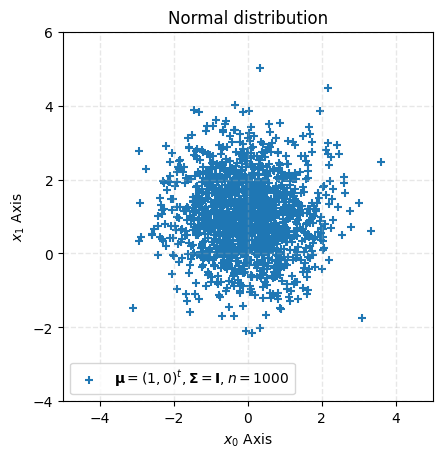

In [6]:
d = 2  # 维度设置为$2$
m = np.array([0, 1])  # 令样本分布均值$\bm{\mu}$为$(1,0)^t$
cov = np.eye(2)  # 令协方差矩阵$\bm{\Sigma}$为单位矩阵$\bm{I}$
n = 1500  # 生成样本点数量

W = GaussianDistriCls(d, m, cov)
X = W.generate(n)

#  输出与可视化
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(xlim=[m[0]-5, m[0]+5], ylim=[m[1]-5, m[1]+5], title='Normal distribution',
       ylabel='$x_1$ Axis', xlabel='$x_0$ Axis')
ax.set_aspect(1)
plt.grid(linestyle='--', linewidth=1, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], label='$\mathbf{\mu}=(1,0)^t, \mathbf{\Sigma}=\mathbf{I}, n=1000$', marker='+')

plt.legend()
plt.savefig('./fig/Normal distribution scatter plot.pdf')
plt.show()

2. 考虑三维正态分布
    $$
        p(\mathbf{x}|\omega_1) \sim N\left({1\choose 0}, \mathbf{I}\right),\ \ p(\mathbf{x}|\omega_2)\sim N\left({-1\choose 0}, \mathbf{I}\right)
    $$
    其中, $\mathbf{I}$为单位矩阵, 且 $P(\omega_1) = P (\omega_2) = 0.5$。 说明贝叶斯判决边界。
3. 产生 $n = 100$ 个点 ($50$ 个 $\omega_1$类的点, $50$ 个 $\omega_2$类的点),并计算经验误差。

In [2]:
def decision_rule(c1, c2, feature):
    """ The Bayes decision rule

    :param c1: class GaussianDistriCls One
    :param c2: class GaussianDistriCls Two
    :param feature: the feature vector of a single sample
    :return: True if g1 > g2, which turns out to assign 'feature' to c1; Otherwise return False
    """
    g1 = c1.discriminant_func(feature)
    g2 = c2.discriminant_func(feature)
    return g1 > g2

def training_error(c1, c2, size):
    """ Computes the training error(i.e. empirical error)

    :param c1: class GaussianDistriCls One
    :param c2: class GaussianDistriCls Two
    :param size: the number of samples to be generated
    :return: the ratio of errors to size
    """
    error = 0
    x1 = c1.generate(size//2)
    x2 = c2.generate(size//2)

    for x in x1:
        if not decision_rule(c1, c2, x):
            error+=1
    for x in x2:
        if not decision_rule(c2, c1, x):
            error+=1
    return error / size


m1 = np.array([1, 0])  # $\omega_1$ 均值$(1, 0)^t$
m2 = np.array([-1, 0])  # $\omega_2$ 均值$(-1, 0)^t$
cov = np.eye(2)  # 两个类的协方差矩阵都是单位矩阵

w1 = GaussianDistriCls(2, m1, cov, 0.5)
w2 = GaussianDistriCls(2, m2, cov, 0.5)

tr_error = training_error(w1, w2, 100)
print(f'The empirical error(training error) is {tr_error}')

The empirical error(training error) is 0.2


4. 对于不断增加的 $n$ 值重复以上步骤, $100 \leq n \leq 1000$, 步长为 $100$, 并绘出所得的经验误差。

The training error sequence: [0.22, 0.13, 0.19, 0.18, 0.154, 0.15166666666666667, 0.14, 0.15, 0.14888888888888888, 0.132, 0.15363636363636363, 0.14666666666666667, 0.16153846153846155, 0.15214285714285714, 0.15733333333333333, 0.16875, 0.1623529411764706, 0.15388888888888888, 0.15578947368421053, 0.1695, 0.15571428571428572, 0.15818181818181817, 0.16521739130434782, 0.15625, 0.1584, 0.15538461538461537, 0.1511111111111111, 0.1667857142857143, 0.15758620689655173, 0.16, 0.16451612903225807, 0.159375, 0.1481818181818182, 0.16117647058823528, 0.164, 0.17166666666666666, 0.16135135135135134, 0.16157894736842104, 0.16102564102564101, 0.1545, 0.15682926829268293, 0.1530952380952381, 0.15953488372093022, 0.15204545454545454, 0.1582222222222222, 0.15456521739130435, 0.14765957446808511, 0.15895833333333334, 0.16326530612244897, 0.1622, 0.1676470588235294, 0.16230769230769232, 0.15735849056603773, 0.15296296296296297, 0.15418181818181817, 0.16339285714285715, 0.16035087719298247, 0.16, 0.157796

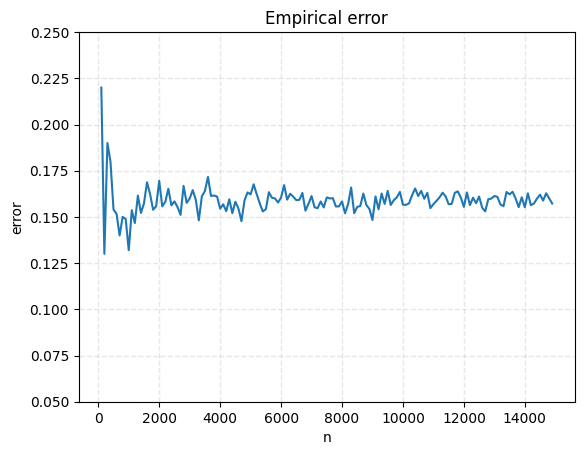

In [6]:
tr_errors = []
n = list(range(100, 15000, 100))
for s in n:
    tr_errors.append(training_error(w1, w2, s))

#  输出与可视化
print(f"The training error sequence: {tr_errors}")
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.set(ylim=[.05, .25], title='Empirical error',
       ylabel='error', xlabel='n')
plt.plot(n, tr_errors, label='Accuracy')
plt.grid(linestyle='--', linewidth=1, alpha=0.3)
plt.savefig('./fig/Empirical error.pdf')
plt.show()